# ADCP Assessment 2.2: ADCP in the Sky

At the time that this notebook was created, there was an issue with the ADCP data displayed on the OOI Data Explorer (DE). The y-axis of pcolormesh plots on DE for ADCP time series have depths up to -500 m which puts these measurements "in the Sky". In this notebook, I will compare the datasets available from the Data Explorer ERDDAP server with datasets for the same sensors from OOINet. We hope this will clarify where the issue is in the data pipeline.

In [16]:
# Import libraries
import numpy as np
import xarray as xr

from ooi_data_explorations.common import load_gc_thredds
from ooi_data_explorations.combine_data import combine_datasets

In [20]:
# Load datasets from DE ERDDAP server 
gp_de_file = "~/code/qartod_testing/data/external/adcp_in_the_sky/ooi-gp03flmb-rim01-02-adcpsl007_f266_5e70_1f9c.nc"
gp_de = xr.open_dataset(gp_de_file)
gp_de.set_coords("time")
gp_de = gp_de.swap_dims({"row": "time"})

gs_de_file = "~/code/qartod_testing/data/external/adcp_in_the_sky/ooi-gs01sumo-rii11-02-adcpsn010_f9b4_6bbe_e00e.nc"
gs_de = xr.open_dataset(gs_de_file)
gs_de.set_coords("time")
gs_de = gs_de.swap_dims({"row": "time"})

In [27]:
# Initialize parameters for goldcopy data request from OOINet
gp_refdes = "GP03FLMB-RIM01-02-ADCPSL007"
gpsite, gpnode, gpsensor = gp_refdes.split("-", 2)

gs_refdes = "GS01SUMO-RII11-02-ADCPSN010"
gssite, gsnode, gssensor = gs_refdes.split("-", 2)

In [28]:
# Request telemtered, recovered host, and recovered instrument data to
# combine. The DE dataset of all deployments combines all delivery
# methods.
gptelem = load_gc_thredds(gpsite, gpnode, gpsensor, "telemetered", "adcps_jln_sio_mule_instrument")
gphost = load_gc_thredds(gpsite, gpnode, gpsensor, "recovered_host", "adcps_jln_sio_mule_instrument")
gpinst = load_gc_thredds(gpsite, gpnode, gpsensor, "recovered_inst", "adcp_velocity_earth")

gstelem = load_gc_thredds(gssite, gsnode, gssensor, "telemetered", "adcps_jln_sio_mule_instrument")
gshost = load_gc_thredds(gssite, gsnode, gssensor, "recovered_host", "adcps_jln_sio_mule_instrument")
gsinst = load_gc_thredds(gssite, gsnode, gssensor, "recovered_inst", "adcp_velocity_earth")

/home/jovyan/code/ooi-data-explorations/python/ooi_data_explorations/common.py:1021: UserWarning: 6 of the 12 downloaded files failed to merge.
  warnings.warn(message)


/home/jovyan/code/ooi-data-explorations/python/ooi_data_explorations/common.py:1021: UserWarning: 8 of the 16 downloaded files failed to merge.
  warnings.warn(message)


/home/jovyan/code/ooi-data-explorations/python/ooi_data_explorations/common.py:1021: UserWarning: 9 of the 19 downloaded files failed to merge.
  warnings.warn(message)


/home/jovyan/code/ooi-data-explorations/python/ooi_data_explorations/common.py:782: UserWarning: No data files were downloaded from the Gold Copy THREDDS server.
  warnings.warn(message)


/home/jovyan/code/ooi-data-explorations/python/ooi_data_explorations/common.py:1021: UserWarning: 4 of the 8 downloaded files failed to merge.
  warnings.warn(message)


In [29]:
# Combine data delivery methods into single dataset for each sensor
gp_gc = combine_datasets(gptelem, gphost, gpinst, None)
gs_gc = combine_datasets(gstelem, gshost, gsinst, None)

Now that we have all of our combined-stream datasets loaded into the notebook, we can check the range of depths in each dataset, and depth timeseries. There are four depth type parameters in the combined gold copy datasets: two with no instrument source in the attributes(`depth_from_pressure` and `non_zero_depth`) and two from the co-located CTDMO (`ctdmo_ghqr_sio_mule_instrument-depth` and `depth`). 
The datasets from the DE ERDDAP server have just one depth-type parameter: `z`.

In [19]:
# Check ranges of depth parameters
print(f"Station PAPA z range from DE:[{gp_de['z'].min()}, {gp_de['z'].max()}]")
print(f"Southern Ocean z range from DE:{np.ptp(gs_de['z'].values)}")

Station PAPA z range from DE:[<xarray.DataArray 'z' ()>
array(0.), <xarray.DataArray 'z' ()>
array(0.)]
Southern Ocean z range from DE:0.0


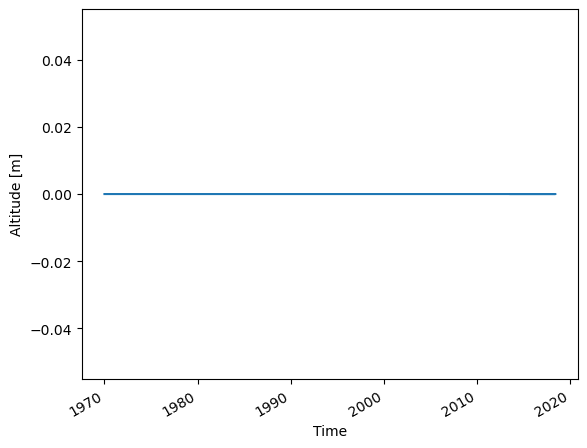

In [21]:
gp_de['z'].plot()

In [22]:
gp_de['time']

<xarray.DataArray 'time' (time: 4912518)>
array(['2013-07-24T07:26:00.000000000', '2013-07-24T07:26:00.000000000',
       '2013-07-24T07:26:00.000000000', ..., '1970-01-01T00:00:00.000000000',
       '1970-01-01T00:00:00.000000000', '1970-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2013-07-24T07:26:00 ... 1970-01-01
Attributes:
    _ChunkSizes:          512
    _CoordinateAxisType:  Time
    actual_range:         [1.37465076e+09 1.68477840e+09]
    axis:                 T
    cf_role:              profile_id
    ioos_category:        Time
    long_name:            Time
    standard_name:        time
    time_origin:          01-JAN-1970 00:00:00

In [31]:
# Check ranges of gold copy depth parameters
print(f"Station PAPA depth_from_pressure range from DE:[{gp_gc['depth_from_pressure'].min().values}, {gp_gc['depth_from_pressure'].max().values}]")
print(f"Southern Ocean depth_from_pressure range from DE:[{gs_gc['depth_from_pressure'].min().values}, {gs_gc['depth_from_pressure'].max().values}]")

print(f"Station PAPA non_zero_depth range from DE:[{gp_gc['non_zero_depth'].min().values}, {gp_gc['non_zero_depth'].max().values}]")
print(f"Southern Ocean non_zero_depth range from DE:[{gs_gc['non_zero_depth'].min().values}, {gs_gc['non_zero_depth'].max().values}]")

print(f"Station PAPA ctdmo_ghqr_sio_mule_instrument-depth range from DE:[{gp_gc['ctdmo_ghqr_sio_mule_instrument-depth'].min().values}, {gp_gc['ctdmo_ghqr_sio_mule_instrument-depth'].max().values}]")
# print(f"Southern Ocean ctdmo_ghqr_sio_mule_instrument-depth range from DE:[{gs_gc['ctdmo_ghqr_sio_mule_instrument-depth'].min().values}, {gs_gc['ctdmo_ghqr_sio_mule_instrument-depth'].max().values}]")

print(f"Station PAPA depth range from DE:[{gp_gc['depth'].min().values}, {gp_gc['depth'].max().values}]")
# print(f"Southern Ocean depth range from DE:[{gs_gc['depth'].min().values}, {gs_gc['depth'].max().values}]")

Station PAPA depth_from_pressure range from DE:[481.8108615552479, 557.467162700832]
Southern Ocean depth_from_pressure range from DE:[18.897096405406707, 505.66615180355086]
Station PAPA non_zero_depth range from DE:[481.8108615552479, 557.467162700832]
Southern Ocean non_zero_depth range from DE:[18.897096405406707, 505.66615180355086]
Station PAPA ctdmo_ghqr_sio_mule_instrument-depth range from DE:[171.24286632302181, 565.9338353985949]
Station PAPA depth range from DE:[1.00874583311923, 565.9338353985949]
